# First LSN Excercise Lesson

## Excercise 1.1

For this excercise we were asked to evaluate the integral $\int_{0}^{1}rdr=\frac{1}{2}$ (and by doing that, test the given random number generator). To do that we implemented a simple hit or miss algorithm, which made possible both the evaluation of the integral with its error and the evaluation of the $\sigma$ with its error. The graphs below show both the integral value and $\sigma$. As we expected the error decreases as the number of throws increases and the values of both the integral and $\sigma$ stabilize.

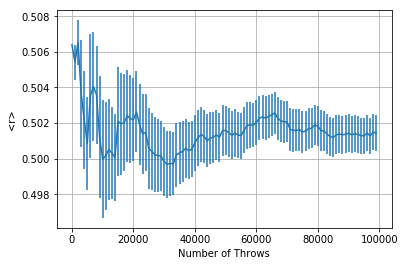

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, error = np.loadtxt("out1.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum,yerr=error)
plt.xlabel('Number of Throws')
plt.ylabel('<r>')
plt.grid(1)
plt.show()

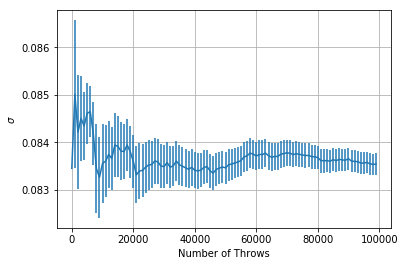

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, error = np.loadtxt("out2.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum,yerr=error)
plt.xlabel('Number of Throws')
plt.ylabel('$\sigma$')
plt.grid(1)
plt.show()

To further test the RNG we implemented the $\chi^2$ test. Doing some calculations on the given number resulted in the expectation that the $\chi^2$ should take a value of approximately 100. The scatter plot of the various $\chi^2_i$ shows that they distribute around that value, so we can be quite sure that the RNG works as expected.

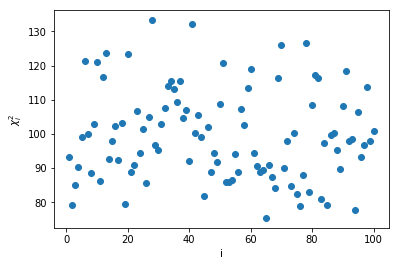

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

i, chi = np.loadtxt("out3.dat", usecols=(0,1), delimiter=";", unpack='true')
plt.scatter(i,chi)
plt.xlabel('i')
plt.ylabel('$\chi^2_i$')
plt.show()

## Excercise 1.2

In this excercise we added the Exponential and the Cauchy-Lorentz distributions to the given random generator. To test them we try to verify the Central Limit Theorem (or its extension); to do that we sum various throws of the dice. We expect that, increasing the number of throws (and consequently the number of sums), the sums will tend to distribute accoding to the limit distibution (Gauss for the Uniform and the Exponential dice, Cauchy-Lorentz for the other one). As the graphs below show, the results obtained are in line with the expectations.

### Histograms of the Standard Dice with various N

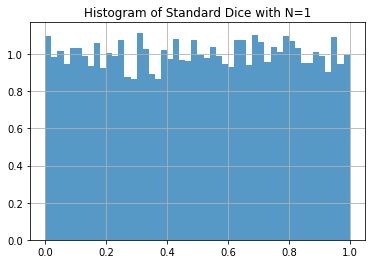

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("standard_N_1.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Standard Dice with N=1')
plt.grid(True)

plt.show()

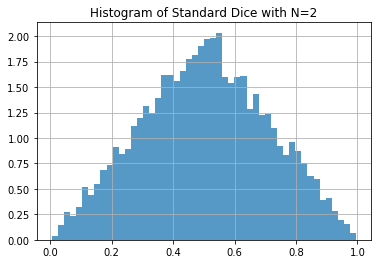

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("standard_N_2.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Standard Dice with N=2')
plt.grid(True)
plt.show()

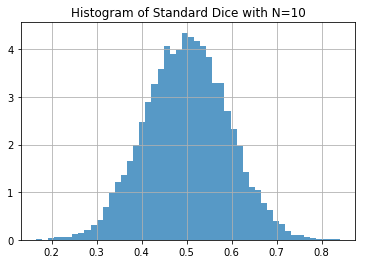

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("standard_N_10.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Standard Dice with N=10')
plt.grid(True)
plt.show()

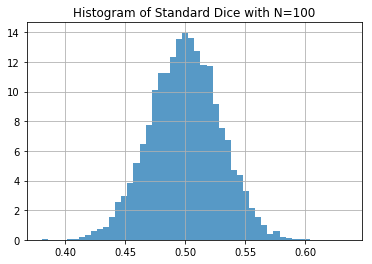

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a * np.exp(-b*(x-c)**2)

y = np.loadtxt("standard_N_100.dat")
n, bins, patches = plt.hist(y, 50, density=True, alpha=0.75)

plt.title('Histogram of Standard Dice with N=100')
plt.grid(True)
plt.show()

### Histograms of the Exponential Dice with various N

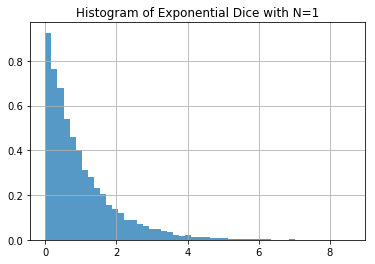

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("exp_N_1.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Exponential Dice with N=1')
plt.grid(True)
plt.show()

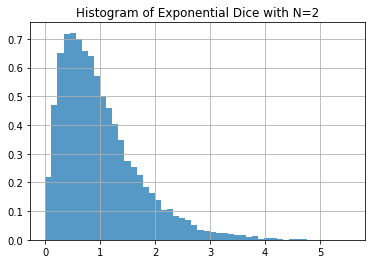

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("exp_N_2.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Exponential Dice with N=2')
plt.grid(True)
plt.show()

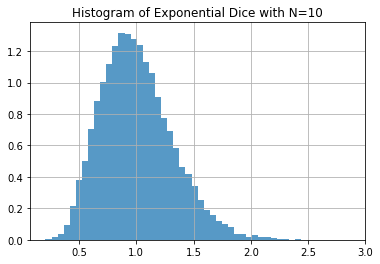

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("exp_N_10.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Exponential Dice with N=10')
plt.grid(True)
plt.show()

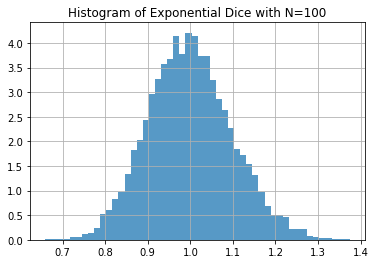

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("exp_N_100.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Exponential Dice with N=100')
plt.grid(True)
plt.show()

### Histograms of the Cauchy-Lorentz Dice with various N

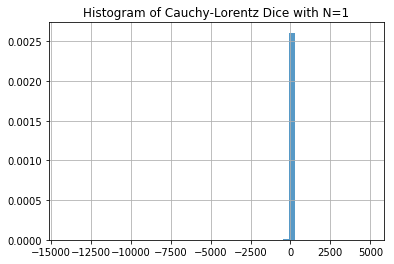

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("lorentz_N_1.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Cauchy-Lorentz Dice with N=1')
plt.grid(True)
plt.show()

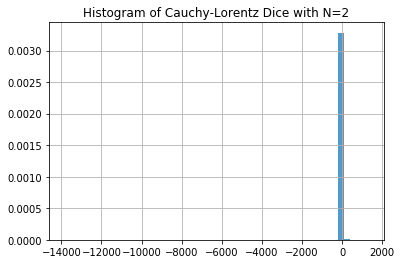

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("lorentz_N_2.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Cauchy-Lorentz Dice with N=2')
plt.grid(True)
plt.show()

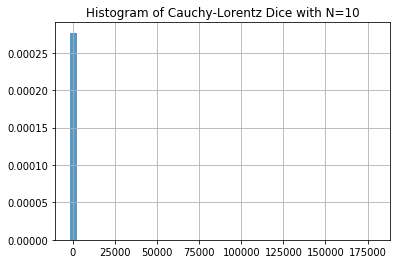

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("lorentz_N_10.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Cauchy-Lorentz Dice with N=10')
plt.grid(True)
plt.show()

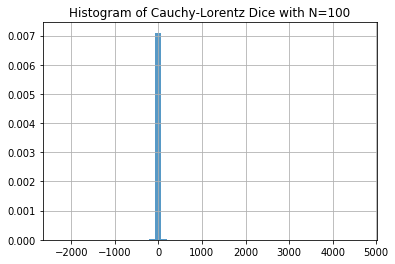

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("lorentz_N_100.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Cauchy-Lorentz Dice with N=100')
plt.grid(True)
plt.show()

## Excercise 1.3

In this excercise we implement Buffon's needle experiment. Basically we try to evaluate $\pi$ via the simulation of a lot of needles falling on a scaled plane. If one calculates the probability of a needle intersecting a line, one obtains $\begin{equation}
P=\frac{2L}{{\pi}d}
\end{equation}$. <br>
Knowing that P is almost equal to $\frac{N_{hits}}{N_{throws}}$ and rearranging one obtains a formula to evaluate $\pi$. <br>
$\begin{equation}
\pi=\frac{2LN_{throws}}{N_{hits} d}
\end{equation}$

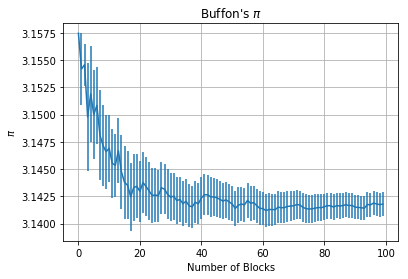

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, error = np.loadtxt("pi.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum,yerr=error)
plt.xlabel('Number of Blocks')
plt.ylabel('$\pi$')
plt.title("Buffon's $\pi$")
plt.grid(1)
plt.show()

## Supplementary Material

In the C++ code for the last excercise, the line commented with __"keeping the points inside the unit circle"__ may stand out. Looking at the angle distributions (inside the circle vs inside the square) one can see that keeping the points inside the unit circle makes the distribution of angles uniform, whereas the one in the square is clearly not.

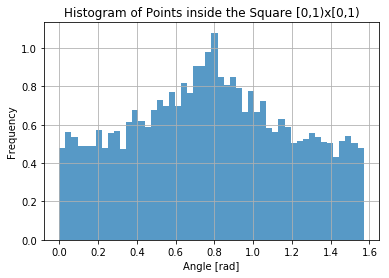

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("angle_dist_st.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Points inside the Square [0,1)x[0,1)')
plt.xlabel("Angle [rad]")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

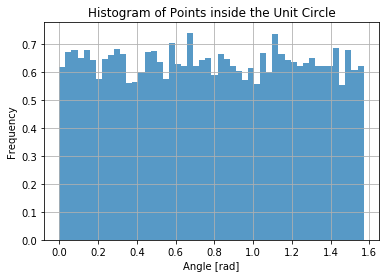

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("angle_dist_circle.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Histogram of Points inside the Unit Circle')
plt.xlabel("Angle [rad]")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()